## Stock Market Analysis using Python, pandas, NumPy

The aim of the project was to extract information about various technology stocks mainly - Google, Apple, Microsoft and Amazon from the online stock trading sites - Yahoo Finance and to visualize different aspects of the stocks like the Adjusted Closing Prices, Volumes of stocks traded on a particular day, moving averages of the closing price-to get a basic idea of which way the price is moving by cutting down noise from the data and the daily returns on the stocks. Correlation plots were created for the daily percentage return and Closing prices of the stocks to check how correlated two stocks are. It was obvious that all technology stocks are positively correlated but few like Amazon and Microsoft were highly correlated with each other. The information gathered on daily percentage returns was further used for Risk Analysis by calculating the Expected Return (Average / mean return of the stock) and standard deviation (measurement of Risk -> Greater the std. dev. greater is the risk and vice versa). A scatter plot was created for comparing the Expected return of stocks to its risk. This helped in visualizing the risk factor of various stocks (stocks with high standard deviation and low return).

In [2]:
#pandas and NumPy imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division in Python 3
from __future__ import division

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
# Summary Stats for Apple stocks
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,115.301818,116.381462,114.060751,115.224861,4.904476e+07,114.088691
std,11.186909,11.022739,11.279050,11.105195,2.062632e+07,10.475899
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.400002,108.849998,105.900002,107.230003,3.501230e+07,106.681981
50%,116.040001,116.820000,114.540001,115.500000,4.477280e+07,114.406813
75%,125.849998,126.690002,124.820000,125.690002,5.528090e+07,123.839032
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [12]:
# General Info about Apple Stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-03-25 to 2016-03-24
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


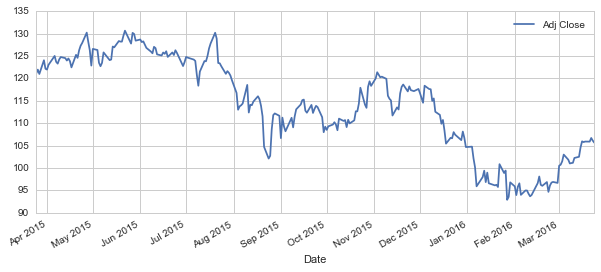

In [13]:
# Historical view of the closing price of Apple stock
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

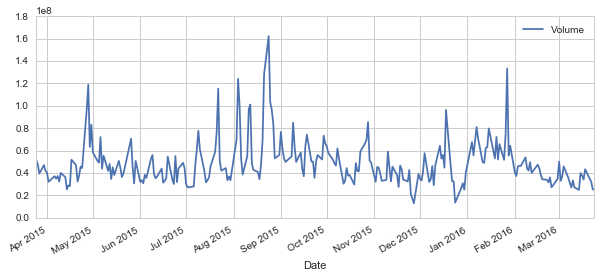

In [14]:
# Historical view of the total volume of Apple stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [16]:
# Calculation of moving averages for 10, 20 and 50 days of Apple stocks
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

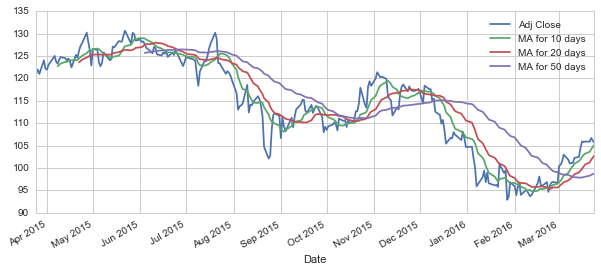

In [17]:
# Hostorical view of the moving averages of Closing Price of Apple Stock
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [18]:
#Calculation to find he percent change for each day of Apple stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

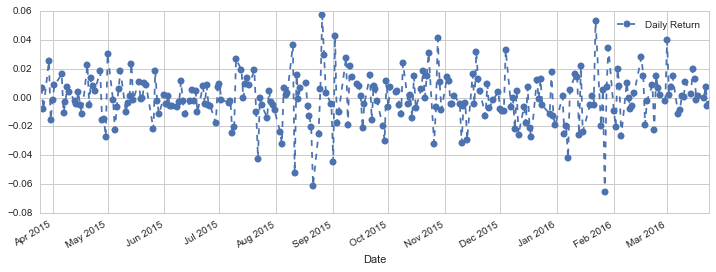

In [19]:
# Visualization of the percent change for each day of Apple stock
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

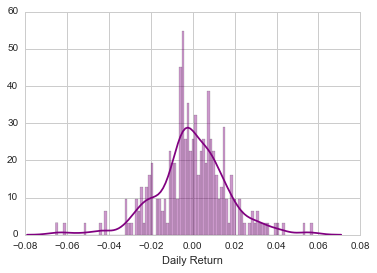

In [20]:
# Histogram to visualiza the average daily return of Apple stock
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [21]:
# Calculation to grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [22]:
# Quick look of the data frame
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-25,121.134491,370.959991,558.787539,40.358680
2015-03-26,121.978840,367.350006,555.172522,40.115321
2015-03-27,121.006860,370.559998,548.342512,39.881698
2015-03-30,124.070079,374.589996,552.032502,39.871962
2015-03-31,122.165384,372.100006,548.002468,39.579932


In [23]:
# Calculate the daily return percent of all stocks and store them in a new tech returns DataFrame
tech_rets = closing_df.pct_change()

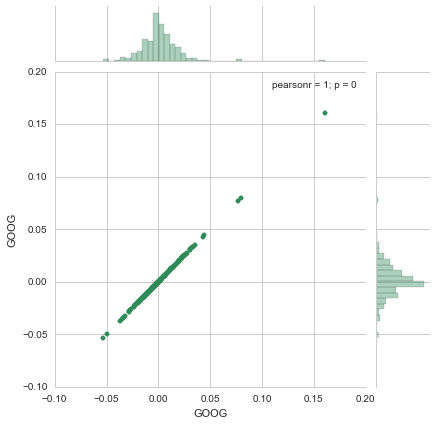

In [24]:
# Comparing Google to itself shows a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

So now we know that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare stocks with each other

C:\Users\Mehul\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


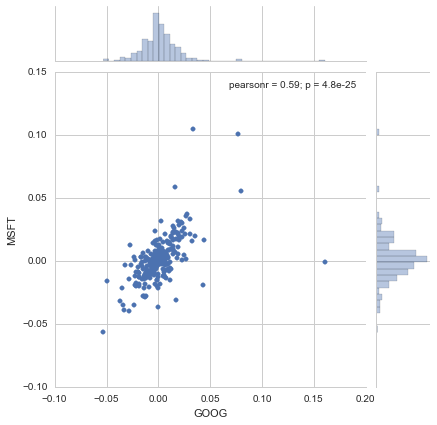

In [25]:
#Joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

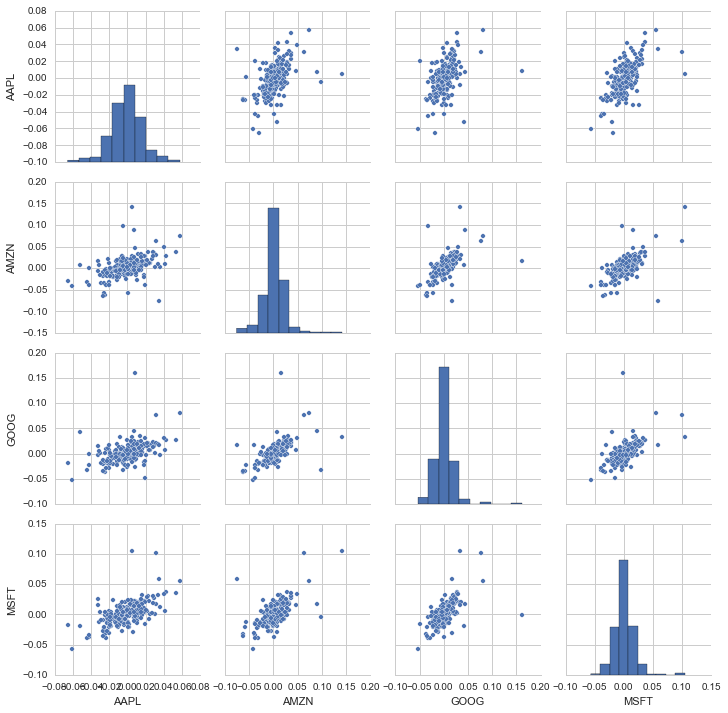

In [26]:
# Correlation analysis for every possible combination of stocks in our technology stock ticker list.
sns.pairplot(tech_rets.dropna())

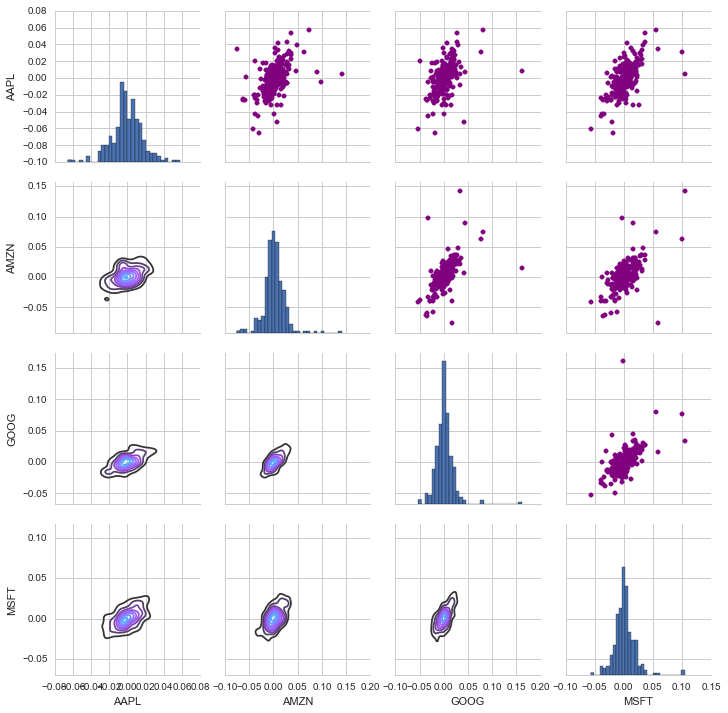

In [30]:
# Mixed plot to visualize the correlation between all technology stocks
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

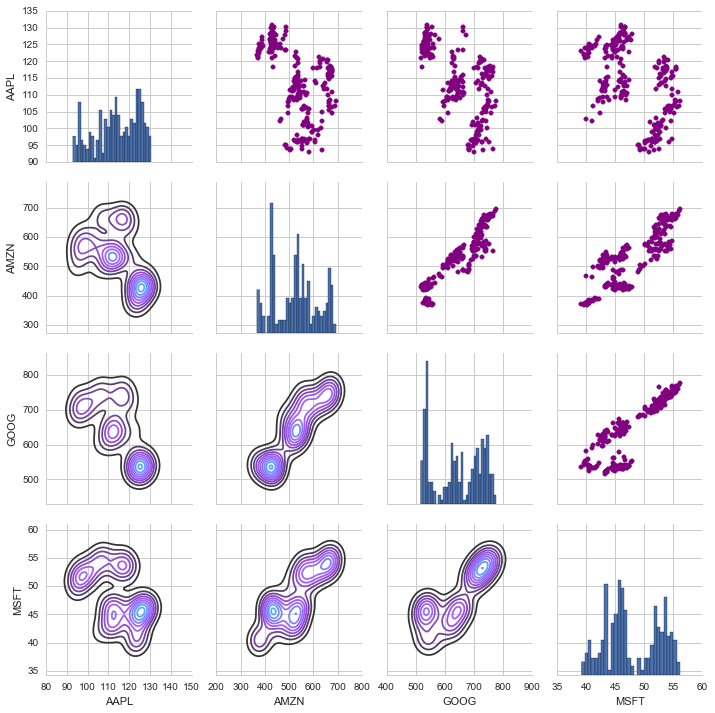

In [28]:
# Correlation analysis by using mixed types of plots for the closing price of all technology stocks
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Mehul\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Mehul\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


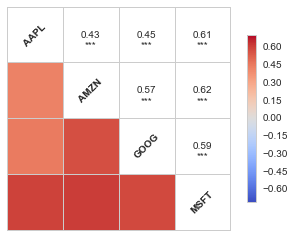

In [31]:
# Correlation plot for the daily returns of all stocks
sns.corrplot(tech_rets.dropna(),annot=True)

There are many ways we can quantify risk, one of the ways is by comparing the expected return with the standard deviation of the daily returns.

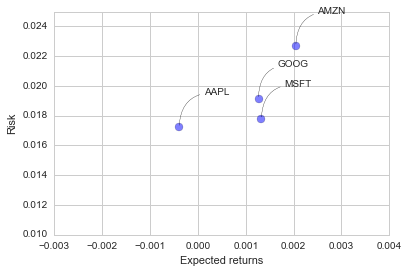

In [54]:
# Cleaning data frame by droping rows having null values
rets = tech_rets.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

It can be visulaized from the above plot that Amazon stock have higher risk but offers higher returns than other stocks whereas Apple stock have lower risk but offers less return on its stock.